In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
import os
from glob import glob
import vaex as vx
from scipy import fftpack
from statistics import mode
from scipy.stats import *

In [2]:
def clean(df):
    df = (df.drop(df.columns, axis=1)                                       #Converting any non-float values into NaN
         .join(df[df.columns].apply(pd.to_numeric, errors='coerce')))       #(fixing structural errors)
    df1 = df.dropna()                                                    #drop NaN columns
    df1 = df1.astype(float)                       #typecasting non-NaN data to float
    mean1 = df1[0].mean()                         #calculating mean of each column
    mean2 = df1[1].mean()
    mean3 = df1[2].mean()
    mean4 = df1[3].mean()
    df[0] = df[0].fillna(mean1)                   #filling all missing/NaN cells with means of respective columns
    df[1] = df[1].fillna(mean2)
    df[2] = df[2].fillna(mean3)
    df[3] = df[3].fillna(mean4)
    
    #limiting the allowed range of observations to [min,max] in the code below
    max = 30
    min = -1
    for i in range(len(df)):
        if(df.loc[i,0]>max):
            df.iloc[i,0]=max
        elif(df.loc[i,0]<min):
            df.iloc[i,0]=min
        if(df.loc[i,1]>max):
            df.iloc[i,1]=max
        elif(df.loc[i,1]<min):
            df.iloc[i,1]=min
        if(df.loc[i,2]>max):
            df.iloc[i,2]=max
        elif(df.loc[i,2]<min):
            df.iloc[i,2]=min
        if(df.loc[i,3]>max):
            df.iloc[i,3]=max
        elif(df.loc[i,3]<min):
            df.iloc[i,3]=min 
            
#     if(not(df.isnull().values.any())):              #prompts that the data is now cleaned
#         print("Cleaned")
            
    return df

In [3]:
class Features:
    def __init__(self, fftlist):
        self.fftlist=fftlist

    def features_normal(self, fftList):#fftlist must be of type pandas
            self.mean = fftList.mean()
            self.median = np.median(fftList)
            self.mode = mode(fftList)
            self.std = np.std(fftList)
            self.var = np.var(fftList)
            self.skew = skew(fftList)
            self.kurt = kurtosis(fftList)
            self.max = fftList.max()
            self.min = fftList.min()
            self.rms = np.sqrt(np.mean(fftList**2))
#             self.cov = np.cov(fftList)#covariance
#             self.corr = fftList.corr()#correlation
#             self.sem = fftList.sem()#standard error of mean
#             self.agg = fftList.aggregate()#aggregation function
            return self

In [4]:
mean_fft_a = []
mean_fft_b = []
mean_fft_c = []
mean_fft_d = []
median_fft_a = []
median_fft_b = []
median_fft_c = []
median_fft_d = []
mode_fft_a = []
mode_fft_b = []
mode_fft_c = []
mode_fft_d = []
std_fft_a = [] 
std_fft_b = [] 
std_fft_c = [] 
std_fft_d = [] 
var_fft_a = []
var_fft_b = []
var_fft_c = []
var_fft_d = []
skew_fft_a = []
skew_fft_b = []
skew_fft_c = []
skew_fft_d = []
kurt_fft_a = []
kurt_fft_b = []
kurt_fft_c = []
kurt_fft_d = []
max_fft_a = []
max_fft_b = []
max_fft_c = []
max_fft_d = []
min_fft_a = []
min_fft_b = []
min_fft_c = []
min_fft_d = []
rms_fft_a = []
rms_fft_b = []
rms_fft_c = []
rms_fft_d = []

In [5]:
def rem_dups(df):
    df.drop_duplicates(subset=[0], keep='first', inplace=False)            #Dropping any duplicate columns ()
    return df

In [6]:
directory = '2nd_test'
filelist =[]
for entry in os.scandir(directory):
    if entry.is_file() and entry.name.endswith('.csv'):
        filepath = entry.path
        filepath = filepath.replace("\\","/")
#         print(filepath)
#         print(type((repr(entry.path))))
        df = pd.read_csv(filepath, sep = '\t', header = None)
        df = clean(df)
        a = df.iloc[:,0]
        b = df.iloc[:,1]
        c = df.iloc[:,2]
        d = df.iloc[:,3]
        a = np.array(a)
        b = np.array(b)
        c = np.array(c)
        d = np.array(d)
        N = len(a)
        sr = 20000
        T = N/sr # total time duration of data
        af = np.abs(np.fft.fft(a))
        bf = np.abs(np.fft.fft(b))
        cf = np.abs(np.fft.fft(c))
        df = np.abs(np.fft.fft(d))
        feat_a = Features(af)
        feat_b = Features(bf)
        feat_c = Features(cf)
        feat_d = Features(df)
        feat_a.features_normal(af)
        feat_b.features_normal(bf)
        feat_c.features_normal(cf)
        feat_d.features_normal(df)
        mean_fft_a.append(feat_a.mean)
        median_fft_a.append(feat_a.median)
        mode_fft_a.append(int(feat_a.mode[0]))
        std_fft_a.append(feat_a.std)
        var_fft_a.append(feat_a.var)
        skew_fft_a.append(feat_a.skew)
        kurt_fft_a.append(feat_a.kurt)
        max_fft_a.append(feat_a.max)
        min_fft_a.append(feat_a.min)
        rms_fft_a.append(feat_a.rms)
        mean_fft_b.append(feat_b.mean)
        median_fft_b.append(feat_b.median)
        mode_fft_b.append(int(feat_b.mode[0]))
        std_fft_b.append(feat_b.std)
        var_fft_b.append(feat_b.var)
        skew_fft_b.append(feat_b.skew)
        kurt_fft_b.append(feat_b.kurt)
        max_fft_b.append(feat_b.max)
        min_fft_b.append(feat_b.min)
        rms_fft_b.append(feat_b.rms)
        mean_fft_c.append(feat_c.mean)
        median_fft_c.append(feat_c.median)
        mode_fft_c.append(int(feat_c.mode[0]))
        std_fft_c.append(feat_c.std)
        var_fft_c.append(feat_c.var)
        skew_fft_c.append(feat_c.skew)
        kurt_fft_c.append(feat_c.kurt)
        max_fft_c.append(feat_c.max)
        min_fft_c.append(feat_c.min)
        rms_fft_c.append(feat_c.rms)
        mean_fft_d.append(feat_d.mean)
        median_fft_d.append(feat_d.median)
        mode_fft_d.append(int(feat_d.mode[0]))
        std_fft_d.append(feat_d.std)
        var_fft_d.append(feat_d.var)
        skew_fft_d.append(feat_d.skew)
        kurt_fft_d.append(feat_d.kurt)
        max_fft_d.append(feat_d.max)
        min_fft_d.append(feat_d.min)
        rms_fft_d.append(feat_d.rms)


In [7]:
mean_df = pd.DataFrame({'a':mean_fft_a,'b':mean_fft_b,'c':mean_fft_c,'d':mean_fft_d},columns = ['a','b','c','d'])
median_df = pd.DataFrame({'a':median_fft_a,'b':median_fft_b,'c':median_fft_c,'d':median_fft_d},columns = ['a','b','c','d'])
mode_df = pd.DataFrame({'a':mode_fft_a,'b':mode_fft_b,'c':mode_fft_c,'d':mode_fft_d},columns = ['a','b','c','d'])
std_df = pd.DataFrame({'a':std_fft_a,'b':std_fft_b,'c':std_fft_c,'d':std_fft_d},columns = ['a','b','c','d'])
var_df = pd.DataFrame({'a':var_fft_a,'b':var_fft_b,'c':var_fft_c,'d':var_fft_d},columns = ['a','b','c','d'])
skew_df = pd.DataFrame({'a':skew_fft_a,'b':skew_fft_b,'c':skew_fft_c,'d':skew_fft_d},columns = ['a','b','c','d'])
kurt_df = pd.DataFrame({'a':kurt_fft_a,'b':kurt_fft_b,'c':kurt_fft_c,'d':kurt_fft_d},columns = ['a','b','c','d'])
max_df = pd.DataFrame({'a':max_fft_a,'b':max_fft_b,'c':max_fft_c,'d':max_fft_d},columns = ['a','b','c','d'])
min_df = pd.DataFrame({'a':min_fft_a,'b':min_fft_b,'c':min_fft_c,'d':min_fft_d},columns = ['a','b','c','d'])
rms_df = pd.DataFrame({'a':rms_fft_a,'b':rms_fft_b,'c':rms_fft_c,'d':rms_fft_d,},columns = ['a','b','c','d'])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

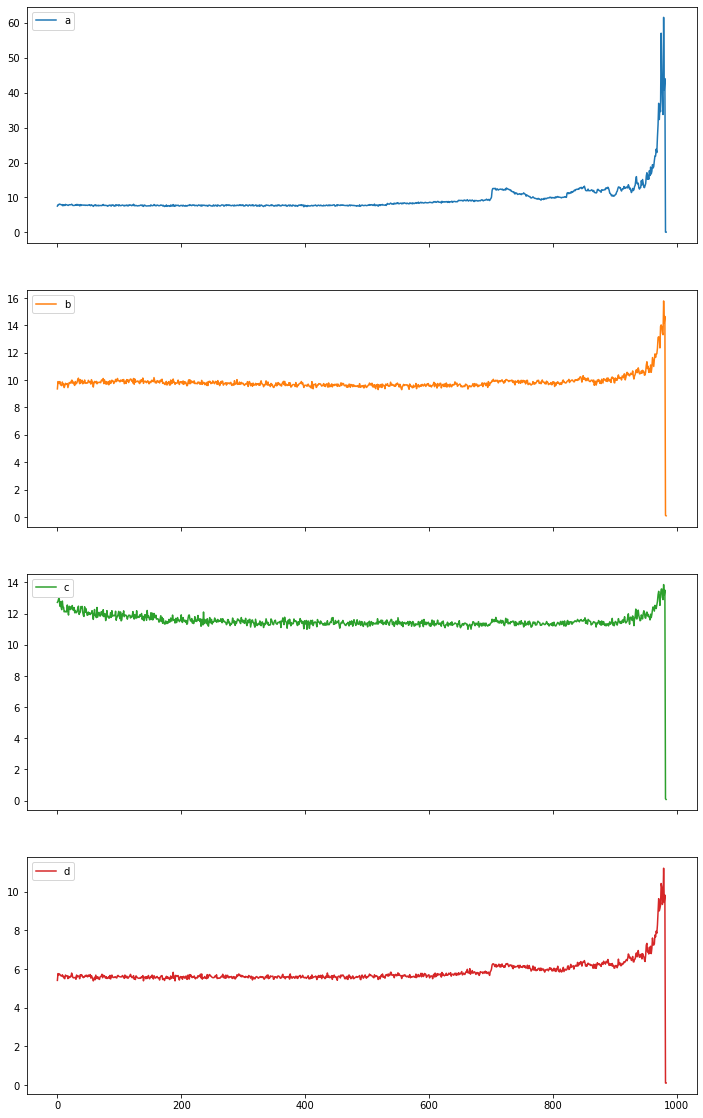

In [8]:
mean_df.plot(subplots=True,figsize = (12,20))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

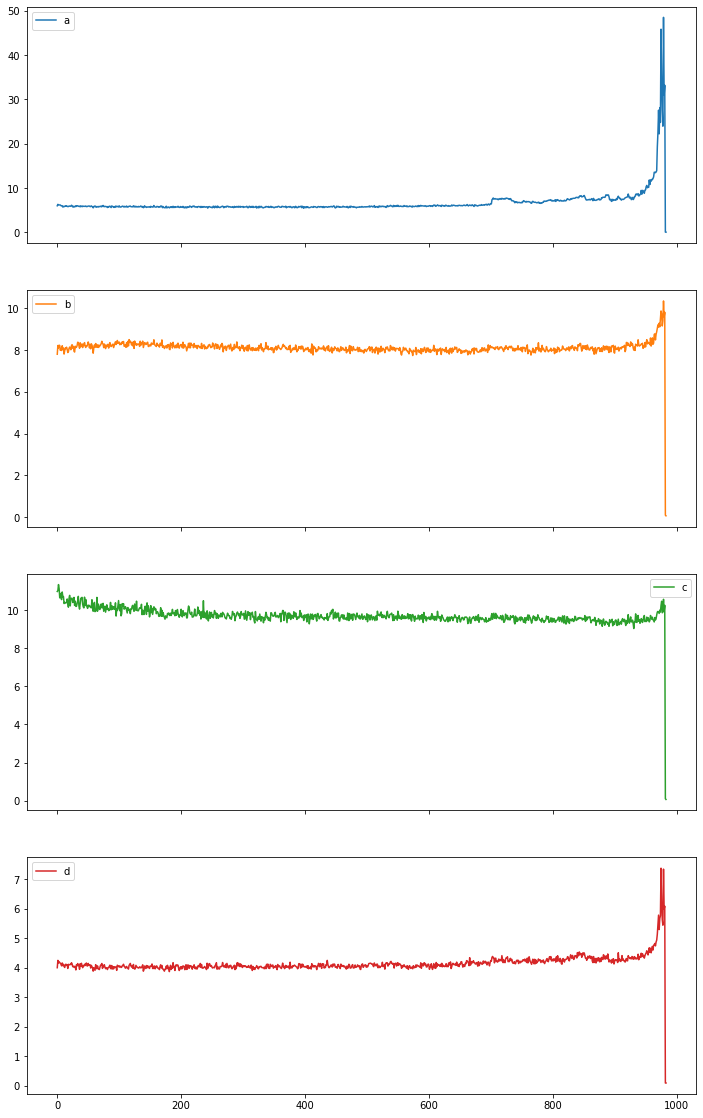

In [9]:
median_df.plot(subplots=True,figsize = (12,20))

In [10]:
mode_df

,a,b,c,d
0,0,0,0,0
1,0,1,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
979,3,0,1,0
980,3,1,2,0
981,3,1,0,0
982,0,0,0,0


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

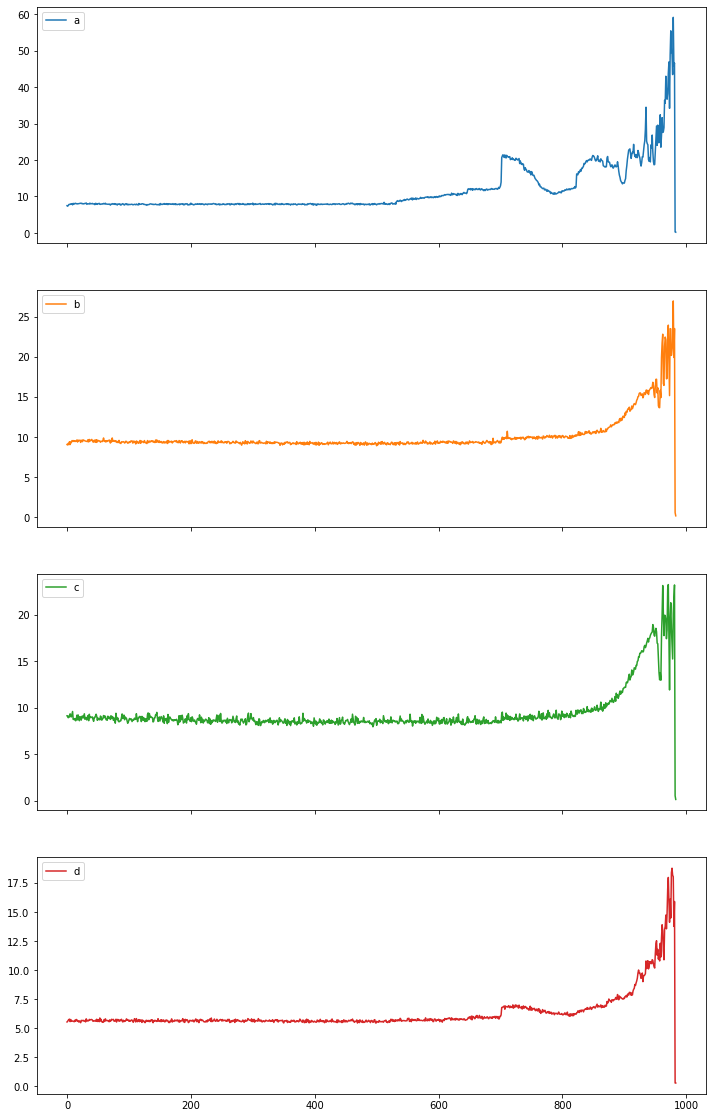

In [10]:
std_df.plot(subplots=True,figsize = (12,20))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

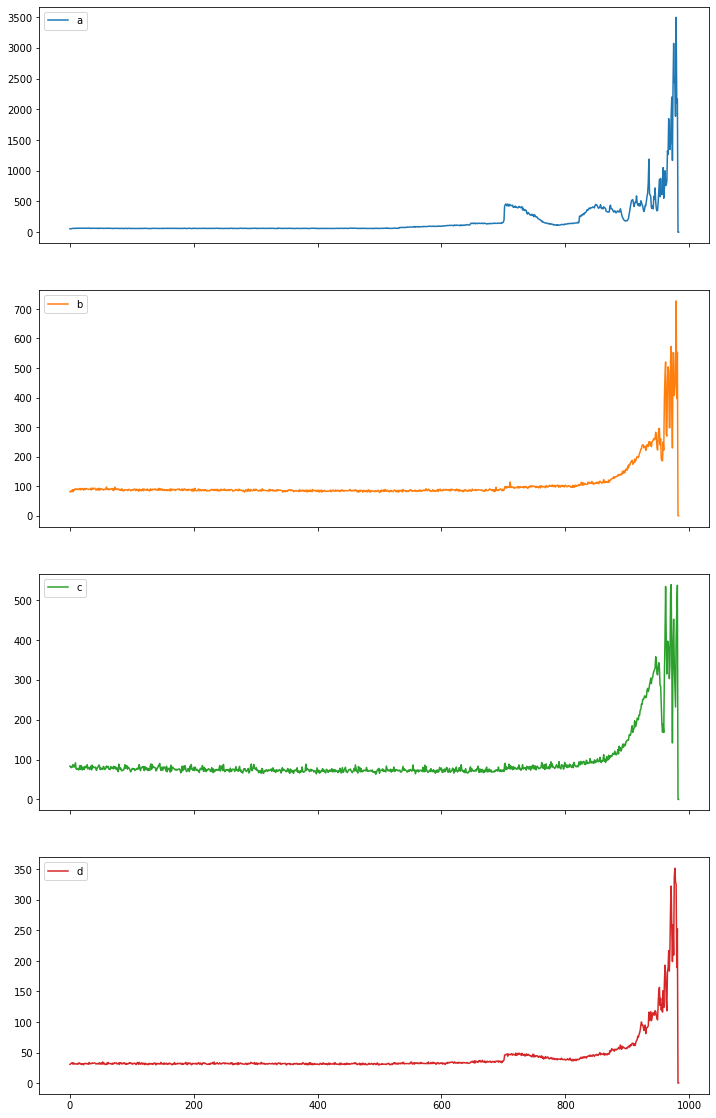

In [11]:
var_df.plot(subplots=True,figsize = (12,20))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

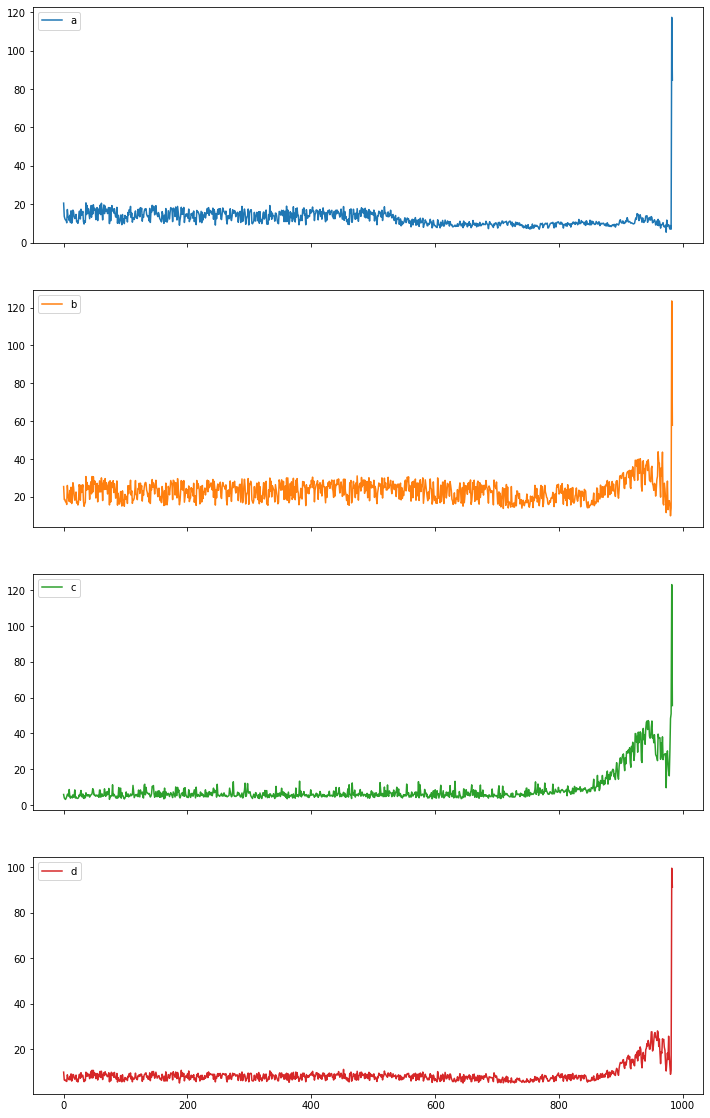

In [12]:
skew_df.plot(subplots=True,figsize = (12,20))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

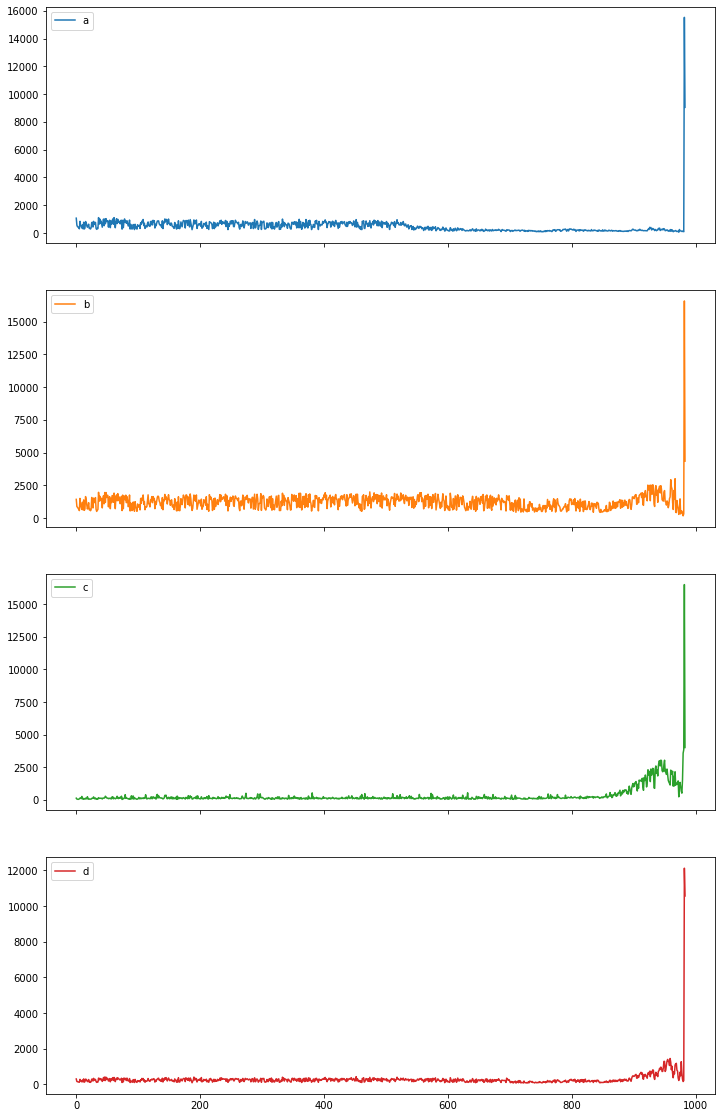

In [13]:
kurt_df.plot(subplots=True,figsize = (12,20))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

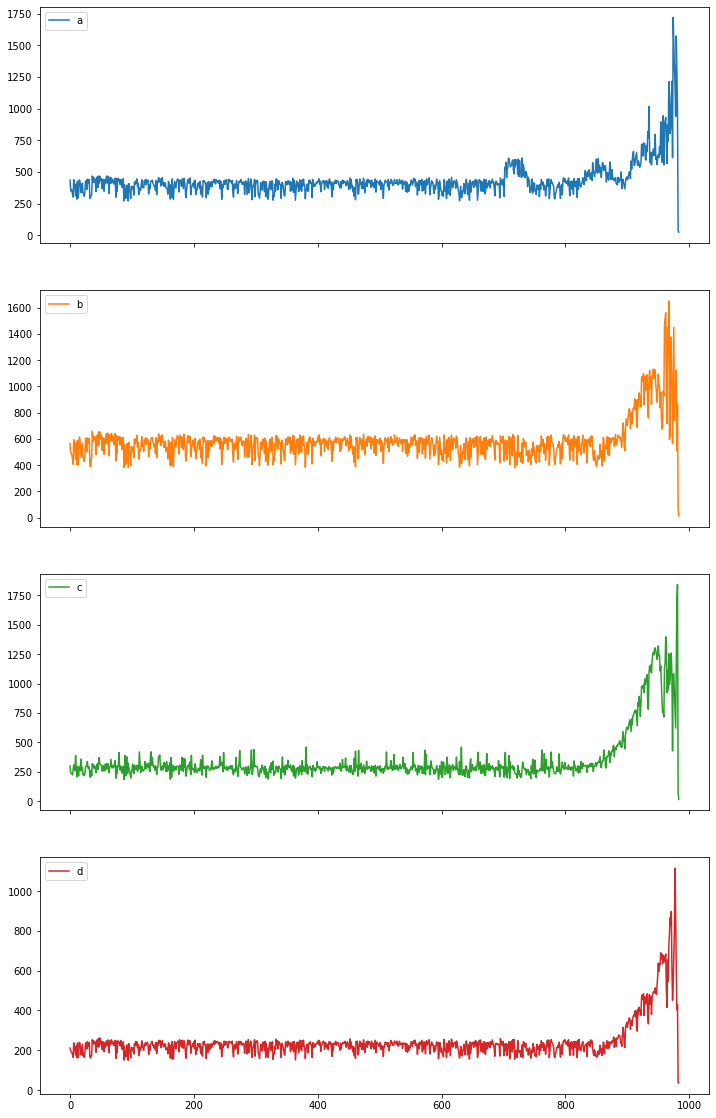

In [14]:
max_df.plot(subplots=True,figsize = (12,20))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

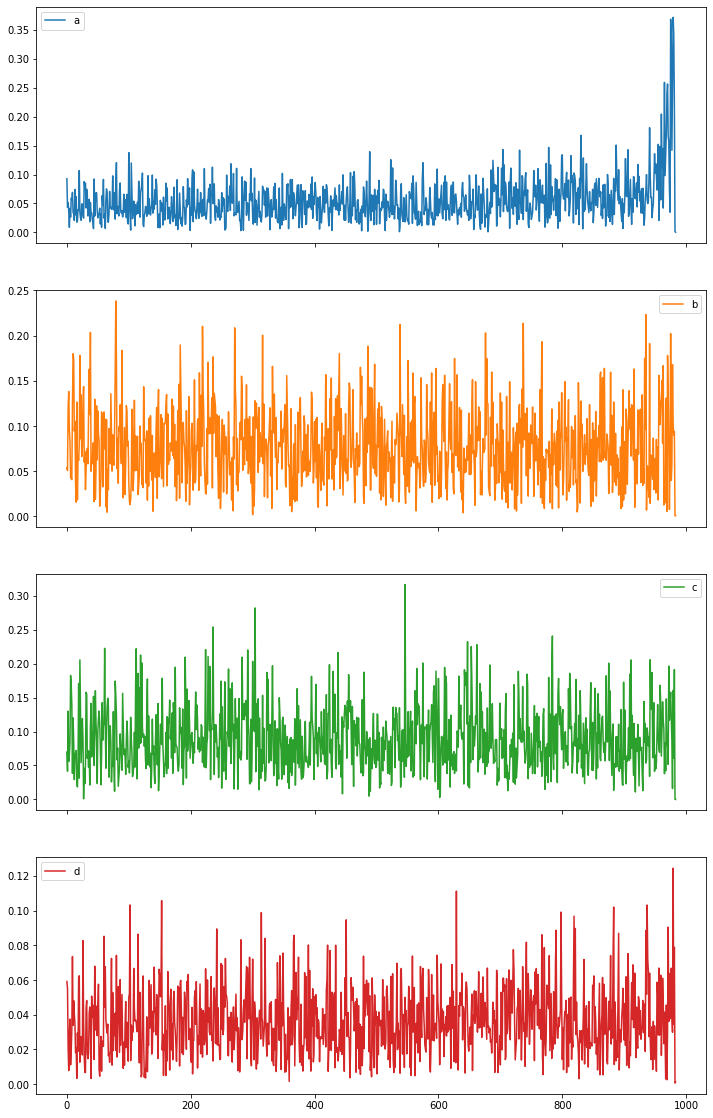

In [15]:
min_df.plot(subplots=True,figsize = (12,20))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

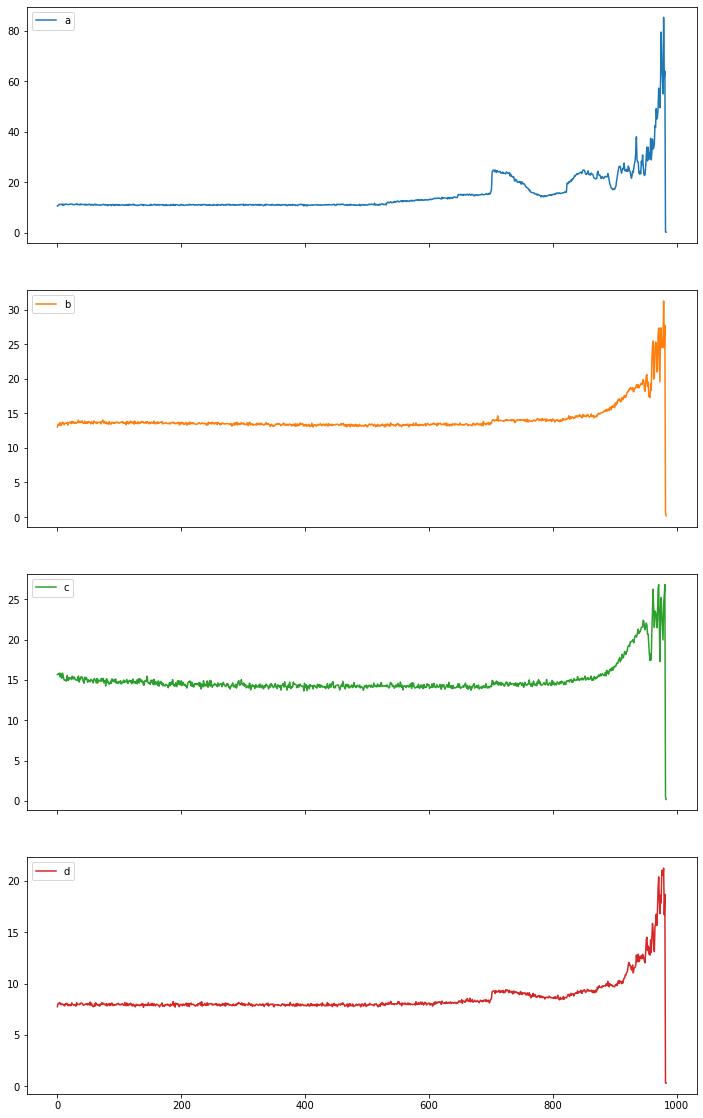

In [16]:
rms_df.plot(subplots=True,figsize = (12,20))